In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from openpyxl import load_workbook
from openpyxl.drawing.image import Image

# CSV 파일 불러오기
data = pd.read_csv('c:/erd.csv')

# 데이터 확인하기
print(data.head())

# NAME으로 그룹화하여 차트 그리기
fig, axs = plt.subplots(nrows=len(data.groupby('NAME')), ncols=4, figsize=(16, 6*len(data.groupby('NAME'))))

grouped_data = data.groupby('NAME')

for i, (name, group) in enumerate(grouped_data):
    ax_row = axs[i]
    
    unique_lotids = group['lotid'].unique()
    num_lotids = len(unique_lotids)
    bar_width = 0.8 / num_lotids  # 각 lotid에 대한 바 너비 계산
    offset = (1 - bar_width) / 2  # 바 시작 위치 계산
    
    for j, lotid in enumerate(unique_lotids):
        ax = ax_row[j]
        lotid_group = group[group['lotid'] == lotid]
        ax.bar(lotid_group['slot'] + (j * bar_width) + offset,
               lotid_group['USL'] - lotid_group['LSL'],
               bottom=lotid_group['LSL'],
               width=bar_width,
               color='skyblue',
               alpha=0.5,
               label='Range')
        ax.scatter(lotid_group['slot'] + (j * bar_width) + offset,
                   lotid_group['Value'],
                   color=plt.cm.tab10(j),
                   label=lotid)
    
        ax.set_xlabel('Slot')
        ax.set_ylabel('Value')
        ax.set_title(f'Range Bar Chart - {name} ({lotid})')
        ax.legend()
        ax.set_xticks(range(1, 26, 2))  # X 축 눈금 설정 (간격을 2로 설정)
        ax.set_xticklabels(range(1, 26, 2))  # X 축 눈금 라벨 설정

plt.tight_layout()
plt.show()

# 이미지로 챠트 저장
plt.savefig('챠트이미지.png')

# 결과를 엑셀로 저장
result_data = data.copy()
result_data['Range'] = result_data['USL'] - result_data['LSL']
result_data.to_excel('결과파일.xlsx', index=False)

# 엑셀 파일에 챠트 이미지 삽입
excel_file = '결과파일.xlsx'
wb = load_workbook(excel_file)

# 이미지 삽입할 시트 선택
ws = wb.active

# 챠트 이미지 삽입
chart_image = Image('챠트이미지.png')
ws.add_image(chart_image, 'E2')

# 이미지 크기 조정
chart_image.width = 400
chart_image.height = 300

# 엑셀 파일 저장
wb.save('결과파일_챠트포함.xlsx')


### ncols가 4개로는 되는데, 차트가 전부 따로 나옴

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 불러오기
data = pd.read_csv('c:/erd.csv')

# 데이터 확인하기
print(data.head())

# NAME으로 그룹화하여 차트 그리기
unique_names = data['NAME'].unique()

fig, axs = plt.subplots(nrows=len(unique_names), ncols=4, figsize=(16, 6*len(unique_names)))

for i, name in enumerate(unique_names):
    ax_row = axs[i]
    group = data[data['NAME'] == name]
    
    unique_lotids = group['lotid'].unique()
    num_lotids = len(unique_lotids)
    bar_width = 0.8 / num_lotids  # 각 lotid에 대한 바 너비 계산
    offset = (1 - bar_width) / 2  # 바 시작 위치 계산
    
    for j, lotid in enumerate(unique_lotids):
        ax = ax_row[j]
        lotid_group = group[group['lotid'] == lotid]
        ax.bar(lotid_group['slot'] + (j * bar_width) + offset,
               lotid_group['USL'] - lotid_group['LSL'],
               bottom=lotid_group['LSL'],
               width=bar_width,
               color='skyblue',
               alpha=0.5,
               label='Range')
        ax.scatter(lotid_group['slot'] + (j * bar_width) + offset,
                   lotid_group['Value'],
                   color=plt.cm.tab10(j),
                   label=lotid)
    
        ax.set_xlabel('Slot')
        ax.set_ylabel('Value')
        ax.set_title(f'Range Bar Chart - {name} ({lotid})')
        ax.legend()
        ax.set_xticks(range(1, 26, 2))  # X 축 눈금 설정 (간격을 2로 설정)
        ax.set_xticklabels(range(1, 26, 2))  # X 축 눈금 라벨 설정

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from openpyxl import load_workbook
from openpyxl.drawing.image import Image

# CSV 파일 불러오기
data = pd.read_csv('c:/erd.csv')

# 데이터 확인하기
print(data.head())

# NAME으로 그룹화하여 차트 그리기
grouped_data = data.groupby('NAME')
num_names = len(grouped_data)

# 챠트 그리기
fig, axs = plt.subplots(nrows=num_names, ncols=4, figsize=(16, 6*num_names))

for i, (name, group) in enumerate(grouped_data):
    row_index = i // 4
    col_index = i % 4
    
    ax = axs[row_index, col_index]
    
    # 같은 NAME에 해당하는 여러 lotid 구하기
    unique_lotids = group['lotid'].unique()
    num_lotids = len(unique_lotids)
    bar_width = 0.8 / num_lotids  # 각 lotid에 대한 바 너비 계산
    offset = (1 - bar_width) / 2  # 바 시작 위치 계산
    
    # 같은 챠트에 다수의 lotid 그리기
    for j, lotid in enumerate(unique_lotids):
        lotid_group = group[group['lotid'] == lotid]
        ax.bar(lotid_group['slot'] + (j * bar_width) + offset,
               lotid_group['USL'] - lotid_group['LSL'],
               bottom=lotid_group['LSL'],
               width=bar_width,
               color='skyblue',
               alpha=0.5,
               label='Range')
        ax.scatter(lotid_group['slot'] + (j * bar_width) + offset,
                   lotid_group['Value'],
                   color=plt.cm.tab10(j),
                   label=lotid)
    
    ax.set_xlabel('Slot')
    ax.set_ylabel('Value')
    ax.set_title(f'Range Bar Chart - {name}')
    ax.legend()
    ax.set_xticks(range(1, 26, 2))  # X 축 눈금 설정 (간격을 2로 설정)
    ax.set_xticklabels(range(1, 26, 2))  # X 축 눈금 라벨 설정

plt.tight_layout()
plt.show()

# 이미지로 챠트 저장
plt.savefig('챠트이미지.png')

# 결과를 엑셀로 저장
result_data = data.copy()
result_data['Range'] = result_data['USL'] - result_data['LSL']
result_data.to_excel('결과파일.xlsx', index=False)

# 엑셀 파일에 챠트 이미지 삽입
excel_file = '결과파일.xlsx'
wb = load_workbook(excel_file)

# 이미지 삽입할 시트 선택
ws = wb.active

# 챠트 이미지 삽입
chart_image = Image('챠트이미지.png')
ws.add_image(chart_image, 'E2')

# 이미지 크기 조정
chart_image.width = 400
chart_image.height = 300

# 엑셀 파일 저장
wb.save('결과파일_챠트포함.xlsx')


# 값이 이제 가로로 나옴
# 값없는 차트도 나옴...

            NAME  Value  LSL  USL    lotid  slot
0       current1    3.0    1    5  AAAAA.1     1
1       current2   15.0   10   20  AAAAA.1     1
2       current3    2.0    1    5  AAAAA.1     2
3  process time1   14.0   10   20  AAAAA.1     2
4       current1    4.1    1    5  AAAAB.1     1


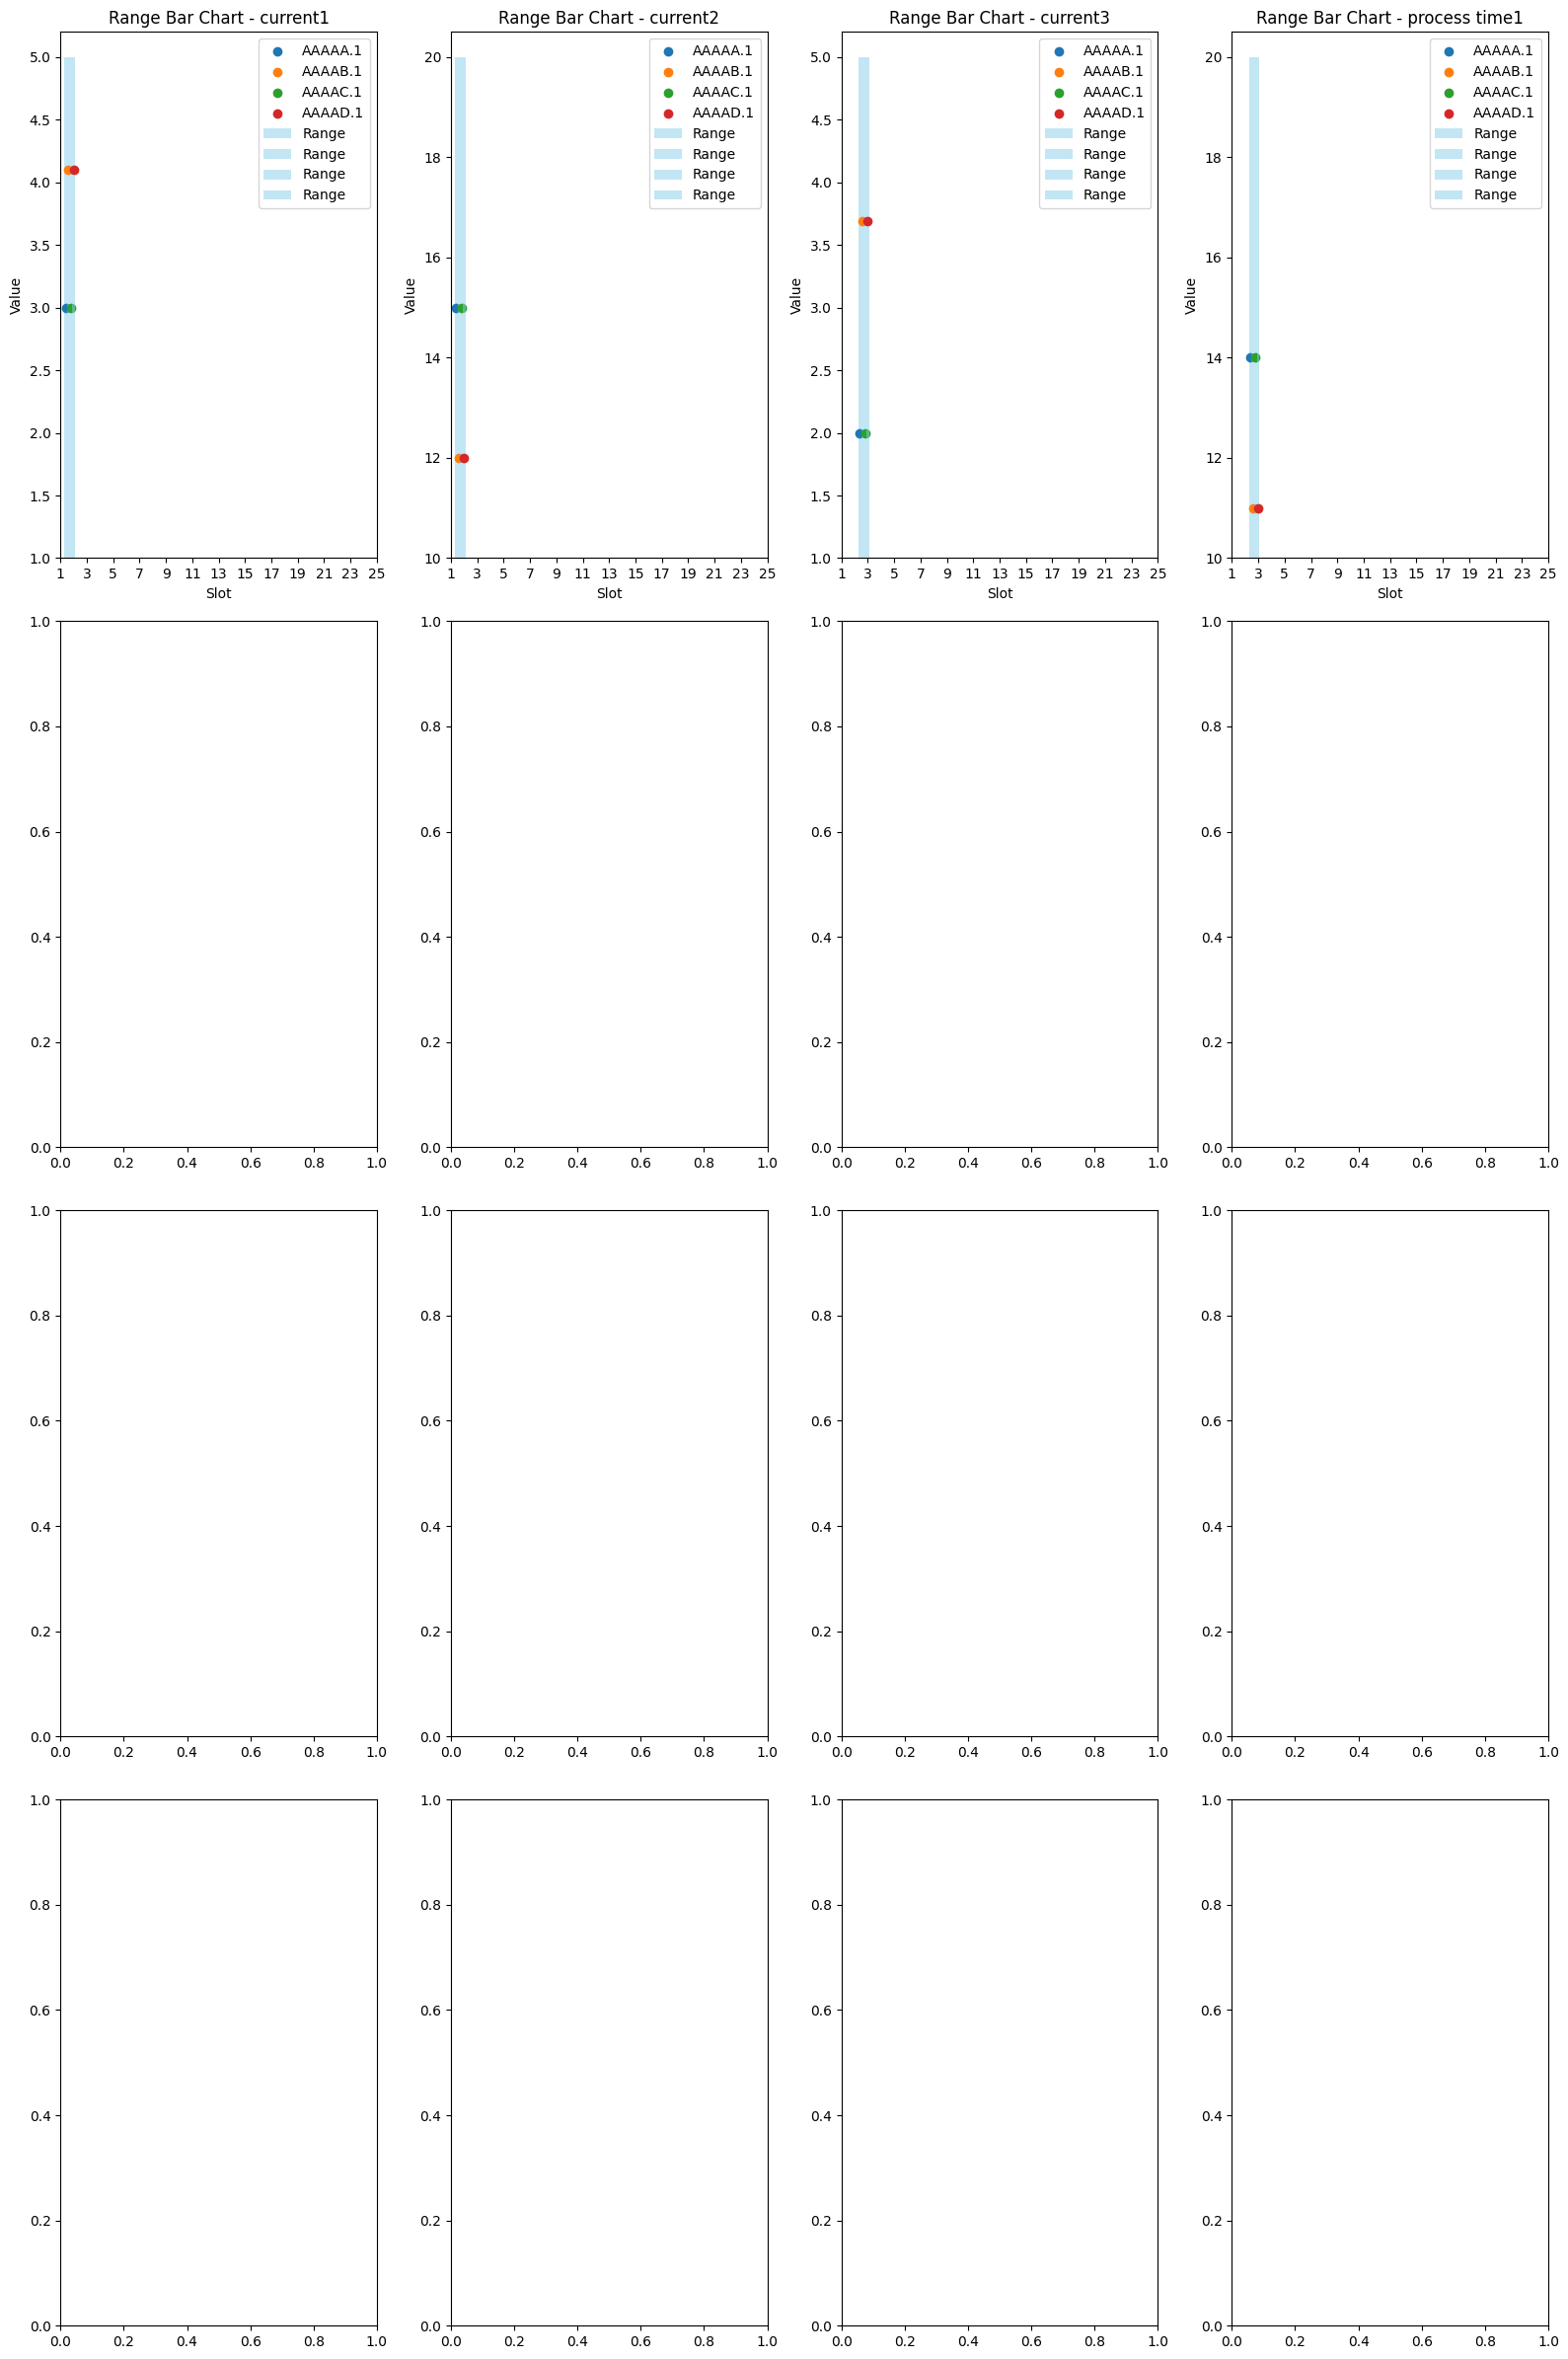

<Figure size 640x480 with 0 Axes>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from openpyxl import load_workbook
from openpyxl.drawing.image import Image

# CSV 파일 불러오기
data = pd.read_csv('c:/erd.csv')

# 데이터 확인하기
print(data.head())

# NAME으로 그룹화하여 차트 그리기
grouped_data = data.groupby('NAME')
num_names = len(grouped_data)

# 챠트 그리기
fig, axs = plt.subplots(nrows=num_names, ncols=4, figsize=(16, 6*num_names))

for i, (name, group) in enumerate(grouped_data):
    row_index = i // 4
    col_index = i % 4
    
    ax = axs[row_index, col_index]
    
    # 같은 NAME에 해당하는 여러 lotid 구하기
    unique_lotids = group['lotid'].unique()
    num_lotids = len(unique_lotids)
    
    # 데이터가 없는 경우 해당 차트 그리기를 스킵
    if num_lotids == 0:
        continue
    
    bar_width = 0.8 / num_lotids  # 각 lotid에 대한 바 너비 계산
    offset = (1 - bar_width) / 2  # 바 시작 위치 계산
    
    # 같은 챠트에 다수의 lotid 그리기
    has_data = False  # 데이터가 있는지 여부 확인
    for j, lotid in enumerate(unique_lotids):
        lotid_group = group[group['lotid'] == lotid]
        if not lotid_group.empty:
            has_data = True
            ax.bar(lotid_group['slot'] + (j * bar_width) + offset,
                   lotid_group['USL'] - lotid_group['LSL'],
                   bottom=lotid_group['LSL'],
                   width=bar_width,
                   color='skyblue',
                   alpha=0.5,
                   label='Range')
            ax.scatter(lotid_group['slot'] + (j * bar_width) + offset,
                       lotid_group['Value'],
                       color=plt.cm.tab10(j),
                       label=lotid)
    
    if not has_data:
        # 데이터가 없는 경우 해당 차트 그리기를 스킵
        ax.axis('off')
    else:
        ax.set_xlabel('Slot')
        ax.set_ylabel('Value')
        ax.set_title(f'Range Bar Chart - {name}')
        ax.legend()
        ax.set_xticks(range(1, 26, 2))  # X 축 눈금 설정 (간격을 2로 설정)
        ax.set_xticklabels(range(1, 26, 2))  # X 축 눈금 라벨 설정

plt.tight_layout()
plt.show()

# 이미지로 챠트 저장
plt.savefig('챠트이미지.png')

# 결과를 엑셀로 저장
result_data = data.copy()
result_data['Range'] = result_data['USL'] - result_data['LSL']
result_data.to_excel('결과파일.xlsx', index=False)

# 엑셀 파일에 챠트 이미지 삽입
excel_file = '결과파일.xlsx'
wb = load_workbook(excel_file)

# 이미지 삽입할 시트 선택
ws = wb.active

# 챠트 이미지 삽입
chart_image = Image('챠트이미지.png')
ws.add_image(chart_image, 'E2')

# 이미지 크기 조정
chart_image.width = 400
chart_image.height = 300

# # 엑셀 파일 저장
# wb.save('결과파일_챠트포함.xlsx')
